In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

from os import listdir
from datetime import datetime
import calendar
import warnings

import matplotlib.pyplot as plt
import matplotlib.style as style
style.use('seaborn-whitegrid')
font = {'size' : 12}
figure = {'titlesize' : 18}
plt.rc('font', **font)
plt.rc('figure', **figure)

import seaborn as sns
sns.set_style("whitegrid")
sns.set(font_scale=1.2)

from tqdm import tqdm
import missingno as msno

---

# Import

In [2]:
path = '../../dataset/archive/'
files = listdir(path)
files

['.DS_Store',
 '.gitignore',
 'BR_category_id.json',
 'BR_youtube_trending_data.csv',
 'CA_category_id.json',
 'CA_youtube_trending_data.csv',
 'DE_category_id.json',
 'DE_youtube_trending_data.csv',
 'FR_category_id.json',
 'FR_youtube_trending_data.csv',
 'GB_category_id.json',
 'GB_youtube_trending_data.csv',
 'IN_category_id.json',
 'IN_youtube_trending_data.csv',
 'JP_category_id.json',
 'KR_category_id.json',
 'KR_youtube_trending_data.csv',
 'MX_category_id.json',
 'MX_youtube_trending_data.csv',
 'RU_category_id.json',
 'US_category_id.json',
 'US_youtube_trending_data.csv']

In [3]:
csv_files = []

for f in files:
    if '.csv' in f:
        csv_files.append(f)
    
csv_files

['BR_youtube_trending_data.csv',
 'CA_youtube_trending_data.csv',
 'DE_youtube_trending_data.csv',
 'FR_youtube_trending_data.csv',
 'GB_youtube_trending_data.csv',
 'IN_youtube_trending_data.csv',
 'KR_youtube_trending_data.csv',
 'MX_youtube_trending_data.csv',
 'US_youtube_trending_data.csv']

In [4]:
d = {}

for file in csv_files:
    d[file[:2]] = pd.read_csv(path + file)
    d[file[:2]]['country'] = file[:2]

df = pd.concat(d.values(), ignore_index=True)

---

# Overview

In [5]:
df.shape

(499874, 17)

In [6]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11T22:21:49Z,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12T00:00:00Z,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11T15:00:13Z,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12T00:00:00Z,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10T14:59:00Z,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12T00:00:00Z,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11T15:00:09Z,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12T00:00:00Z,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11T20:04:02Z,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12T00:00:00Z,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR


In [7]:
# # data heatmap

# msno.matrix(df, figsize=(15, 5));

In [8]:
df.isnull().sum()

video_id                0
title                   0
publishedAt             0
channelId               0
channelTitle            1
categoryId              0
trending_date           0
tags                    0
view_count              0
likes                   0
dislikes                0
comment_count           0
thumbnail_link          0
comments_disabled       0
ratings_disabled        0
description          6106
country                 0
dtype: int64

In [9]:
df.dtypes

video_id             object
title                object
publishedAt          object
channelId            object
channelTitle         object
categoryId            int64
trending_date        object
tags                 object
view_count            int64
likes                 int64
dislikes              int64
comment_count         int64
thumbnail_link       object
comments_disabled      bool
ratings_disabled       bool
description          object
country              object
dtype: object

---

# Feature engineering

## Extract dates

In [10]:
cols = ['publishedAt', 'trending_date']
df[cols].sample(5)

,publishedAt,trending_date
392654,2020-09-02T17:10:20Z,2020-09-08T00:00:00Z
268742,2021-03-17T18:11:02Z,2021-03-20T00:00:00Z
134504,2020-11-25T17:00:00Z,2020-11-30T00:00:00Z
376326,2021-03-29T08:14:12Z,2021-03-31T00:00:00Z
335539,2020-08-19T03:00:17Z,2020-08-23T00:00:00Z


In [11]:
# extract year, month, day, and hour from time features

date_formats = {'y':[0, 4], 'm':[5, 7], 'd':[8, 10], 'h':[11, 13]}     # index of dates within string
for col in cols:
    for key, [start, end] in date_formats.items():
        df['{}_{}'.format(col, key)] = df[col].str[start:end].astype(int)

In [12]:
# convert original time features to datetime

for col in cols:
    df[col] = pd.to_datetime(df[col], format='%Y-%m-%dT%H:%M:%SZ')

In [13]:
# find day of the week

for col in cols:
    df['{}_{}'.format(col, 'w')] = df[col].apply(lambda x: calendar.day_name[x.weekday()])

In [14]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,country,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,trending_date_h,publishedAt_w,trending_date_w
0,s9FH4rDMvds,LEVEI UM FORA? FINGI ESTAR APAIXONADO POR ELA!,2020-08-11 22:21:49,UCGfBwrCoi9ZJjKiUK8MmJNw,Pietro Guedes,22,2020-08-12,pietro|guedes|ingrid|ohara|pingrid|vlog|amigos...,263835,85095,487,4500,https://i.ytimg.com/vi/s9FH4rDMvds/default.jpg,False,False,"Salve rapaziada, neste vídeo me declarei pra e...",BR,2020,8,11,22,2020,8,12,0,Tuesday,Wednesday
1,jbGRowa5tIk,ITZY “Not Shy” M/V TEASER,2020-08-11 15:00:13,UCaO6TYtlC8U5ttz62hTrZgg,JYP Entertainment,10,2020-08-12,JYP Entertainment|JYP|ITZY|있지|ITZY Video|ITZY ...,6000070,714310,15176,31040,https://i.ytimg.com/vi/jbGRowa5tIk/default.jpg,False,False,ITZY Not Shy M/V[ITZY Official] https://www.yo...,BR,2020,8,11,15,2020,8,12,0,Tuesday,Wednesday
2,3EfkCrXKZNs,Oh Juliana PARÓDIA - MC Niack,2020-08-10 14:59:00,UCoXZmVma073v5G1cW82UKkA,As Irmãs Mota,22,2020-08-12,OH JULIANA PARÓDIA|MC Niack PARÓDIA|PARÓDIAS|A...,2296748,39761,5484,0,https://i.ytimg.com/vi/3EfkCrXKZNs/default.jpg,True,False,Se inscrevam meus amores! 📬 Quer nos mandar al...,BR,2020,8,10,14,2020,8,12,0,Monday,Wednesday
3,gBjox7vn3-g,Contos de Runeterra: Targon | A Estrada Tortuosa,2020-08-11 15:00:09,UC6Xqz2pm50gDCORYztqhDpg,League of Legends BR,20,2020-08-12,Riot|Riot Games|League of Legends|lol|trailer|...,300510,46222,242,2748,https://i.ytimg.com/vi/gBjox7vn3-g/default.jpg,False,False,Você se unirá aos Lunari e aos Solari em Targo...,BR,2020,8,11,15,2020,8,12,0,Tuesday,Wednesday
4,npoUGx7UW7o,Entrevista com Thammy Miranda | The Noite (10/...,2020-08-11 20:04:02,UCEWOoncsrmirqnFqxer9lmA,The Noite com Danilo Gentili,23,2020-08-12,The Noite|The Noite com Danilo Gentili|Danilo ...,327235,22059,3972,2751,https://i.ytimg.com/vi/npoUGx7UW7o/default.jpg,False,False,Danilo Gentili recebe Thammy Miranda. Após pas...,BR,2020,8,11,20,2020,8,12,0,Tuesday,Wednesday


In [15]:
# drop trending_date_h since all 0

df = df.drop(columns='trending_date_h')

## Number of tags

In [16]:
tags = df['tags'].str.split('|')

In [17]:
l = []     # list to keep number of tags

for t in tags:
    l.append(len(t))
    
df['tags_n'] = l

In [18]:
df.loc[df['tags'] == '[None]', 'tags_n'] = 0

In [19]:
df['tags_n'].value_counts()

0      63543
10     15085
6      14809
9      14770
22     14154
       ...  
120        5
93         5
117        2
101        1
129        1
Name: tags_n, Length: 120, dtype: int64

## Title legnth

In [20]:
df['title_len'] = df['title'].str.len()

## Title letter case

In [21]:
df['title_upper'] = df['title'].str.count(r'[A-Z]')
df['title_lower'] = df['title'].str.count(r'[a-z]')
df['title_case_ratio'] = df['title_upper']/df['title_lower']
df['title_case_ratio'] = df['title_case_ratio'].replace(np.inf, np.nan)

## Description legnth

In [22]:
df['des_len'] = df['description'].str.len()

## Punctuation count

In [23]:
df['punc_count'] = df['title'].str.count(r'[~!@#$%^*]')

---

# Distributions

## Numerical data

In [24]:
df.describe()

,categoryId,view_count,likes,dislikes,comment_count,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,tags_n,title_len,title_upper,title_lower,title_case_ratio,des_len,punc_count
count,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,499874.00,413762.00,493768.00,499874.00
mean,19.16,1977152.47,118476.23,2994.52,12231.54,2020.50,6.50,15.68,13.11,2020.51,6.44,15.64,17.27,53.98,12.90,24.44,0.86,936.09,0.38
std,6.76,5996266.65,414437.02,52657.96,110248.79,0.50,3.87,8.65,6.42,0.50,3.86,8.62,13.45,22.50,12.82,18.40,2.95,862.00,0.83
min,1.00,0.00,0.00,0.00,0.00,2020.00,1.00,1.00,0.00,2020.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00
25%,17.00,252727.50,9571.25,191.00,694.00,2020.00,3.00,8.00,9.00,2020.00,3.00,8.00,7.00,37.00,5.00,9.00,0.18,358.00,0.00
50%,22.00,637740.50,28969.00,536.00,2003.00,2020.00,8.00,16.00,14.00,2021.00,5.00,16.00,16.00,51.00,9.00,24.00,0.26,654.00,0.00
75%,24.00,1626219.25,89087.00,1676.00,6002.00,2021.00,10.00,23.00,18.00,2021.00,10.00,23.00,25.00,69.00,16.00,37.00,0.54,1229.00,0.00
max,29.00,264407389.00,16254784.00,12341474.00,6738572.00,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00,135.00,100.00,85.00,84.00,83.00,4998.00,18.00


In [25]:
# quantiles every 10%

df.select_dtypes(include=np.number).quantile(np.arange(0.1, 1.1, 0.1))

,categoryId,view_count,likes,dislikes,comment_count,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,tags_n,title_len,title_upper,title_lower,title_case_ratio,des_len,punc_count
0.10,10.00,109993.60,3769.00,76.00,250.00,2020.00,1.00,4.00,3.00,2020.00,1.00,4.00,0.00,26.00,2.00,0.00,0.10,167.00,0.00
0.20,10.00,200139.40,7400.00,148.00,530.00,2020.00,2.00,7.00,7.00,2020.00,2.00,7.00,5.00,34.00,4.00,4.00,0.16,300.00,0.00
0.30,17.00,311103.80,12193.90,239.00,874.00,2020.00,3.00,10.00,10.00,2020.00,3.00,10.00,9.00,40.00,5.00,13.00,0.19,413.00,0.00
0.40,20.00,450672.00,18905.00,360.00,1337.00,2020.00,4.00,13.00,12.00,2020.00,4.00,13.00,12.00,46.00,7.00,19.00,0.22,528.00,0.00
0.50,22.00,637740.50,28969.00,536.00,2003.00,2020.00,8.00,16.00,14.00,2021.00,5.00,16.00,16.00,51.00,9.00,24.00,0.26,654.00,0.00
0.60,23.00,902878.60,44593.80,810.00,2990.00,2021.00,9.00,18.00,16.00,2021.00,9.00,19.00,20.00,57.00,11.00,28.00,0.31,828.00,0.00
0.70,24.00,1319457.00,69412.20,1290.00,4670.00,2021.00,10.00,21.00,17.00,2021.00,10.00,21.00,23.00,65.00,14.00,34.00,0.42,1070.00,0.00
0.80,24.00,2052441.00,118054.00,2249.00,8000.00,2021.00,11.00,25.00,19.00,2021.00,11.00,24.00,27.00,75.00,20.00,40.00,0.71,1439.00,1.00
0.90,25.00,3966805.00,245812.30,4874.00,17191.00,2021.00,12.00,28.00,21.00,2021.00,12.00,27.00,34.00,89.00,31.00,51.00,1.62,2093.00,1.00
1.00,29.00,264407389.00,16254784.00,12341474.00,6738572.00,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00,135.00,100.00,85.00,84.00,83.00,4998.00,18.00


In [26]:
# quantiles of top 10%

df.select_dtypes(include=np.number).quantile(np.arange(0.9, 1.01, 0.01))

,categoryId,view_count,likes,dislikes,comment_count,publishedAt_y,publishedAt_m,publishedAt_d,publishedAt_h,trending_date_y,trending_date_m,trending_date_d,tags_n,title_len,title_upper,title_lower,title_case_ratio,des_len,punc_count
0.90,25.00,3966805.00,245812.30,4874.00,17191.00,2021.00,12.00,28.00,21.00,2021.00,12.00,27.00,34.00,89.00,31.00,51.00,1.62,2093.00,1.00
0.91,25.00,4375173.70,271155.00,5479.00,19140.00,2021.00,12.00,28.00,21.00,2021.00,12.00,28.00,35.00,91.00,32.00,52.00,1.80,2185.00,1.00
0.92,26.00,4840286.00,303638.00,6231.00,21783.16,2021.00,12.00,28.00,22.00,2021.00,12.00,28.00,36.00,92.00,34.00,53.00,2.00,2293.00,2.00
0.93,26.00,5460121.04,341307.89,7180.00,24979.00,2021.00,12.00,29.00,22.00,2021.00,12.00,29.00,37.00,94.00,36.00,55.00,2.33,2422.00,2.00
0.94,26.00,6238423.00,388760.62,8387.00,29184.34,2021.00,12.00,29.00,22.00,2021.00,12.00,29.00,39.00,95.00,38.00,56.00,2.67,2577.00,2.00
0.95,27.00,7310179.00,451645.45,10100.00,34831.00,2021.00,12.00,29.00,22.00,2021.00,12.00,29.00,41.00,96.00,40.00,58.00,3.12,2743.00,2.00
0.96,27.00,8772266.36,535582.56,12409.00,43701.24,2021.00,12.00,30.00,22.00,2021.00,12.00,30.00,43.00,97.00,43.00,60.00,3.75,2968.00,2.00
0.97,28.00,10997204.00,683095.05,15872.00,58196.00,2021.00,12.00,30.00,23.00,2021.00,12.00,30.00,46.00,98.00,47.00,62.00,4.67,3211.00,3.00
0.98,28.00,14985230.60,981293.60,22230.00,85740.54,2021.00,12.00,30.00,23.00,2021.00,12.00,30.00,50.00,99.00,52.00,64.00,6.29,3620.00,3.00
0.99,28.00,23290179.78,1524244.54,36235.00,140343.54,2021.00,12.00,31.00,23.00,2021.00,12.00,31.00,58.00,100.00,60.00,67.00,10.25,4188.00,4.00


===
categoryId



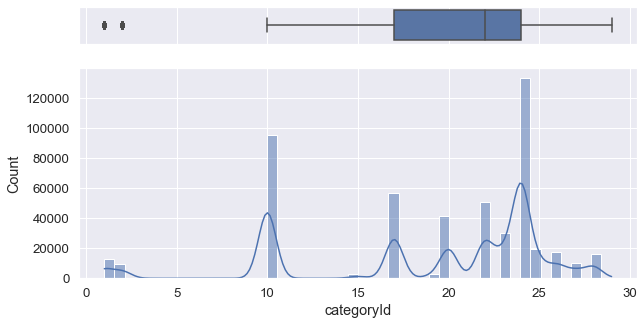


===
view_count



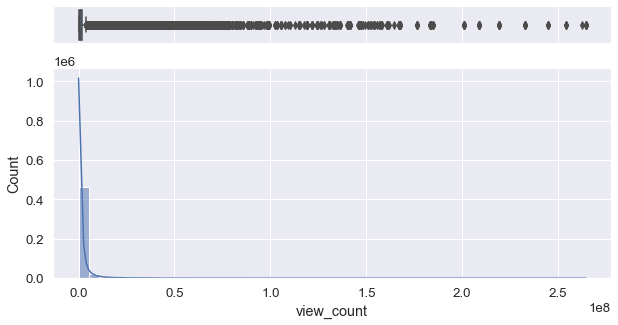


===
likes



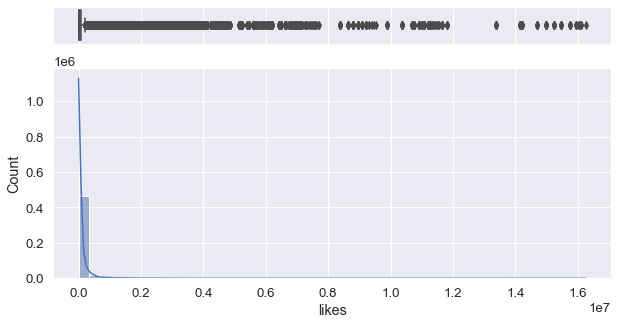


===
dislikes



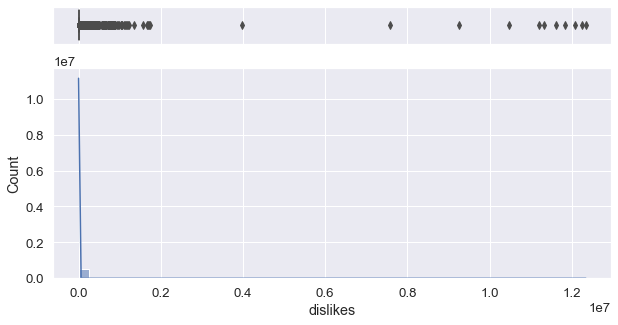


===
comment_count



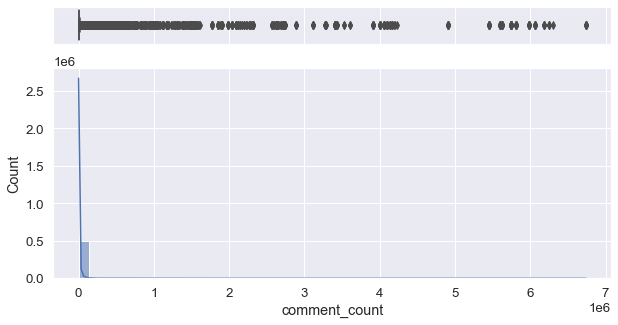


===
publishedAt_y



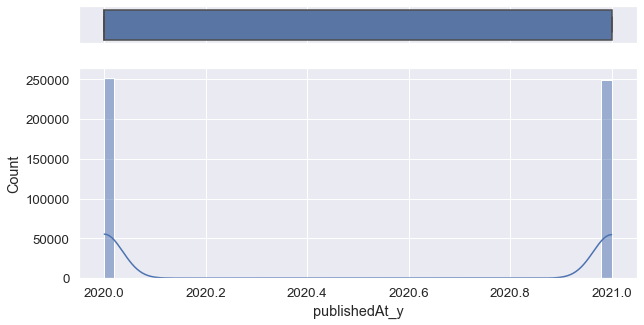


===
publishedAt_m



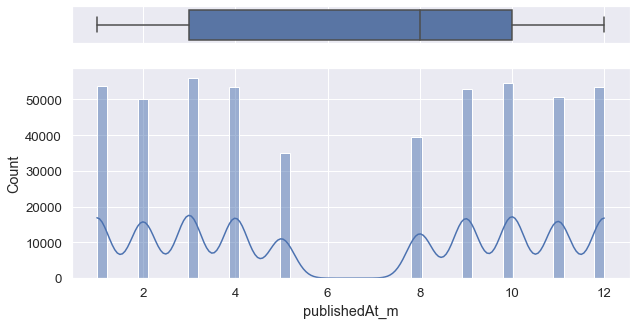


===
publishedAt_d



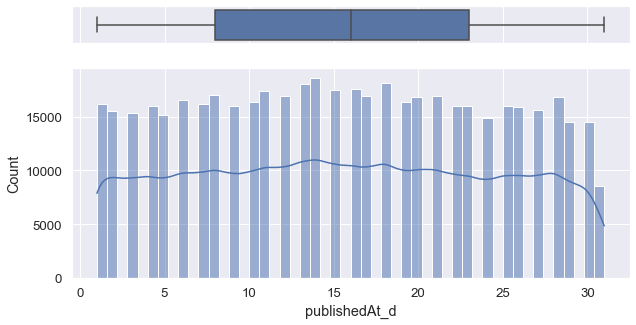


===
publishedAt_h



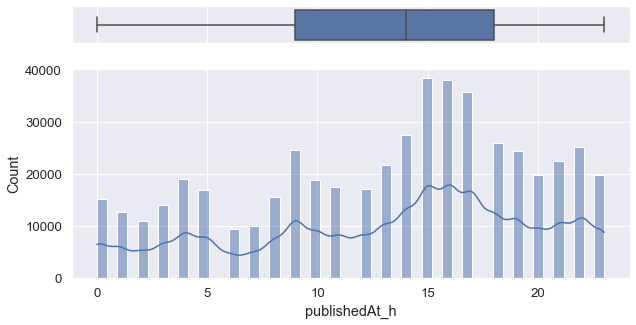


===
trending_date_y



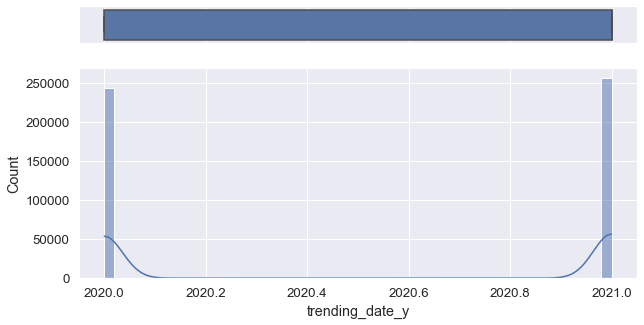


===
trending_date_m



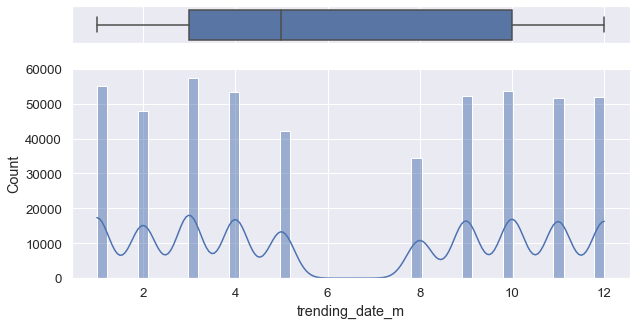


===
trending_date_d



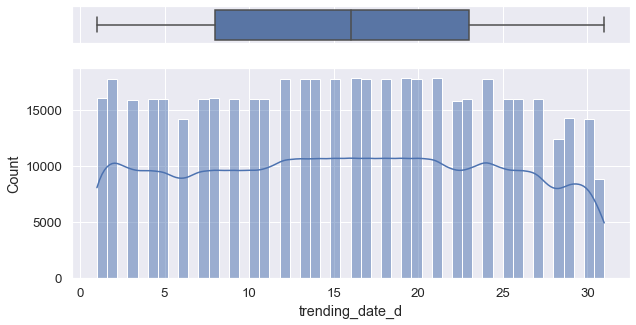


===
tags_n



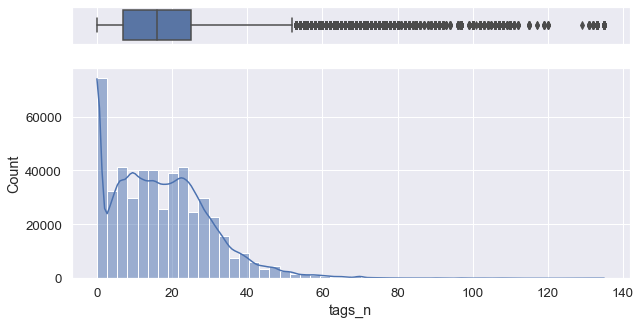


===
title_len



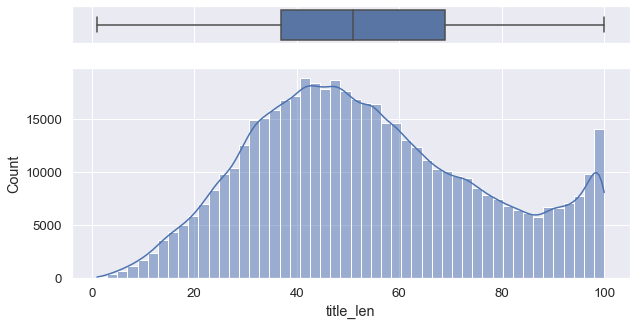


===
title_upper



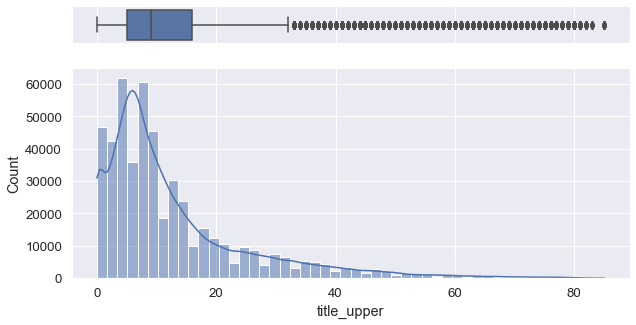


===
title_lower



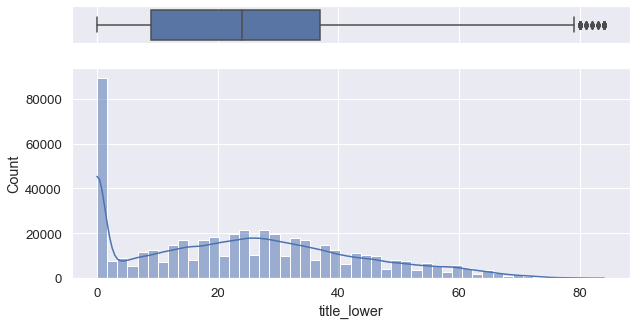


===
title_case_ratio



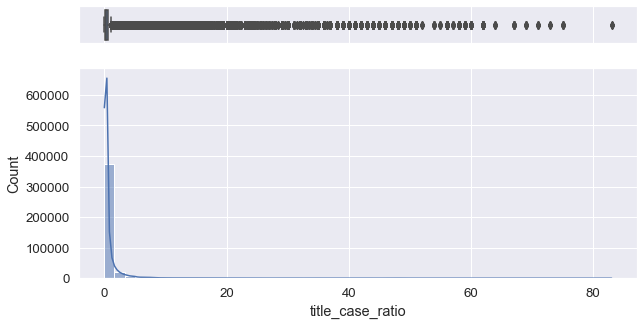


===
des_len



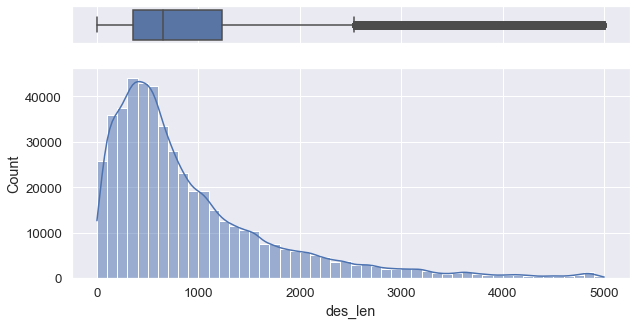


===
punc_count



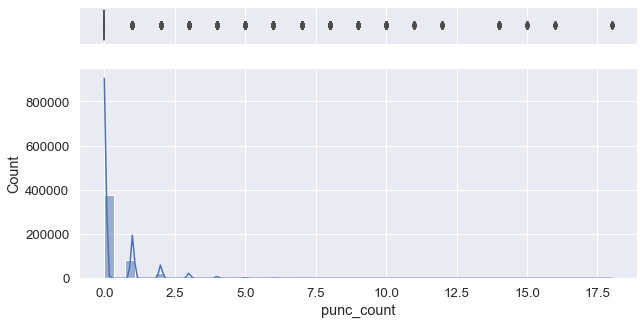

In [27]:
# plot boxplot and histogram distributions

for col in df.select_dtypes(include=np.number).columns:
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')
    f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    sns.boxplot(data=df, x=col, ax=ax[0])
    ax[0].set(xlabel='')
    sns.histplot(data=df, x=col, ax=ax[1], bins=50, kde=True)
    plt.show();
    print('')

In [28]:
# removing top 1% of view_count, likes, dislikes, and comment_count

cols = ['view_count', 'likes', 'dislikes', 'comment_count']

q_by_01 = df.select_dtypes(include=np.number).quantile(np.arange(0.9, 1.01, 0.01))
df_99 = df.copy()
q_99 = q_by_01.iloc[[9]]

for col in cols:
    df_99.loc[df_99[col] > q_99[col].values[0], col] = np.nan

===
view_count



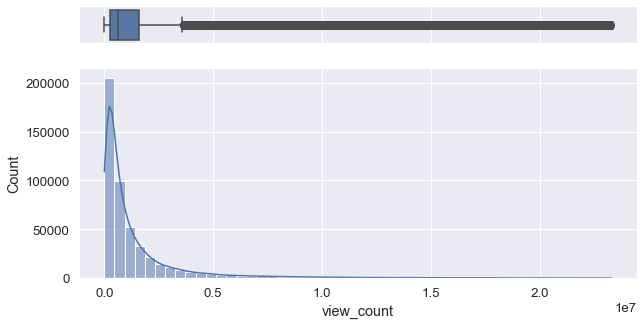


===
likes



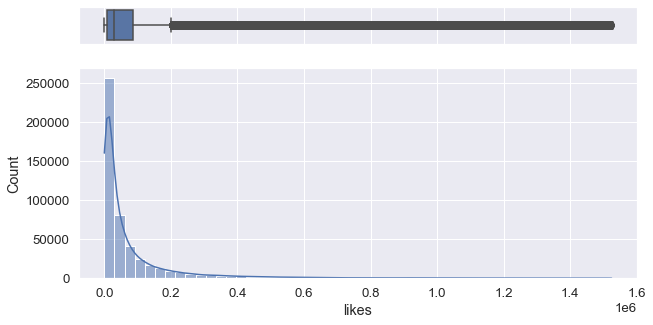


===
dislikes



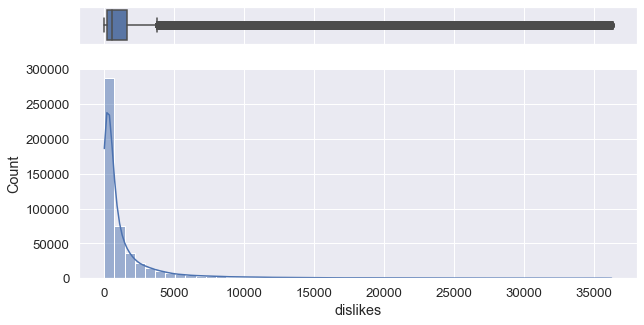


===
comment_count



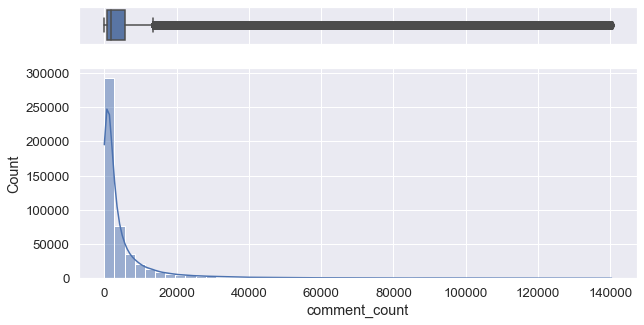

In [29]:
# plot boxplot and histogram distributions

for col in df_99[cols].columns:
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')
    f, ax = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(10, 5))
    sns.boxplot(data=df_99, x=col, ax=ax[0])
    ax[0].set(xlabel='')
    sns.histplot(data=df_99, x=col, ax=ax[1], bins=50, kde=True)
    plt.show();
    print('')

## Categorical data

===
video_id

      video_id  count
0  pvPsJFRGleA     77
1  gdZLi9oWNZg     75
2  CKZvWhCqx1s     74
3  vRXZj0DzXIA     74
4  _ysomCGaZLw     73
5  zFT3f9biz68     72
6  dyRsYk0LyA8     72
7  9rhadTURsrw     72
8  vtRJZEHdu8M     71
9  3CxtK7-XtE0     69


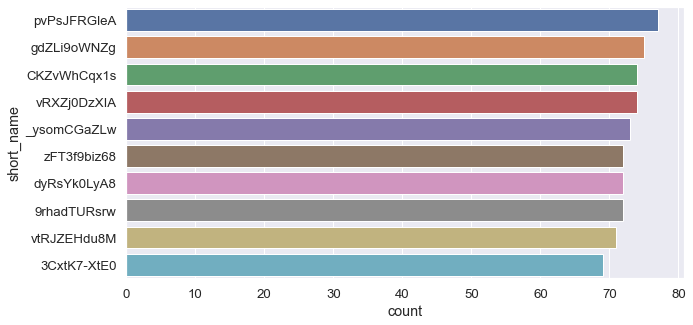


===
title

                                               title  count
0                                   Starlink Mission    287
1         Justin Bieber - Holy ft. Chance The Rapper     77
2                 BTS (방탄소년단) 'Dynamite' Official MV     75
3    BLACKPINK - 'Ice Cream (with Selena Gomez)' M/V     74
4                         ROSÉ - 'On The Ground' M/V     74
5                     ITZY 마.피.아. In the morning M/V     73
6  The Weeknd’s FULL Pepsi Super Bowl LV Halftime...     72
7                   BLACKPINK – ‘Lovesick Girls’ M/V     72
8                 BTS (방탄소년단) 'Film out' Official MV     72
9                            LILI’s FILM [The Movie]     71


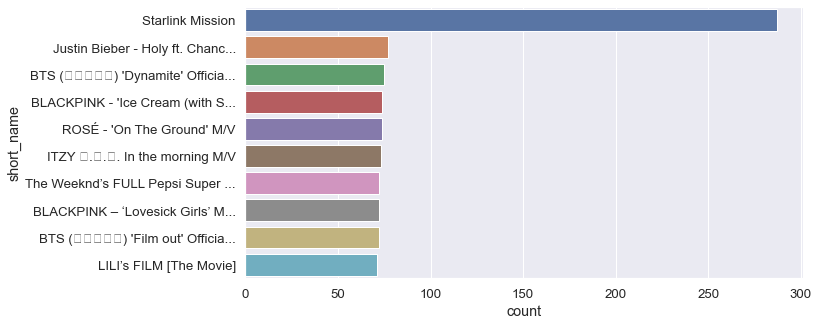


===
channelId

                  channelId  count
0  UCEf_Bc-KVd7onSeifS3py9g   1295
1  UC3IZKseVpdzPSBaWxBxundA   1242
2  UCOmHUn--16B90oW2L6FRR3A   1050
3  UCLkAepWjdylmXSltofFvsYQ   1037
4  UCDVYQ4Zhbm3S2dlz7P1GBDg   1024
5  UCWJ2lWNubArHWmf3FIHbfcQ    940
6  UCMmVPVb0BwSIOWVeDwlPocQ    877
7  UC4i_9WvfPRTuRWEaWyfKuFw    852
8  UCNAf1k0yIjyGu3k9BwAg3lg    843
9  UCtI0Hodo5o5dUb67FeUjDeA    833


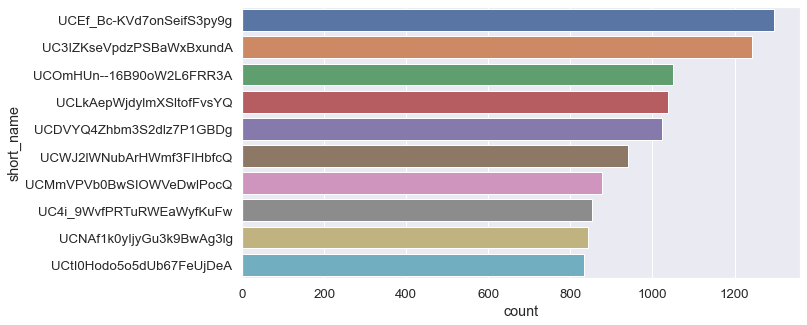


===
channelTitle

          channelTitle  count
0               SMTOWN   1295
1            BLACKPINK   1050
2            BANGTANTV   1037
3                  NFL   1024
4                  NBA    940
5       Big Hit Labels    918
6     The United Stand    877
7             BT Sport    852
8  Sky Sports Football    843
9               SpaceX    833


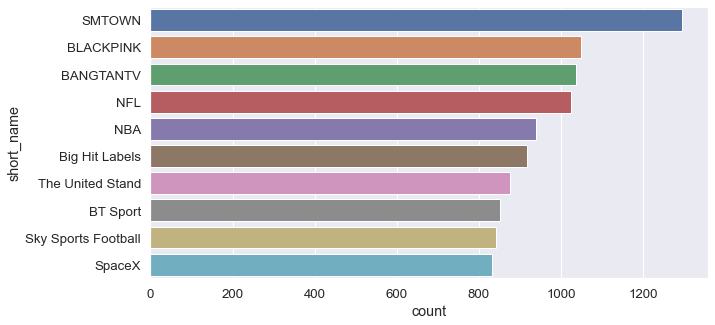


===
tags

                                                tags  count
0                                             [None]  63543
1                    BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄    895
2  방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...    529
3  zee5|web series trailer|zee5 originals|latest ...    514
4  방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...    426
5  Amber|amber vtuber|genshi|genshi game|genshi i...    420
6                 짤툰|만화|애니메이션|웹툰|병맛|더빙|병맛더빙|yt:cc=on    414
7  liga nfa|nfa|liga|free fire|garena|lbff|copa f...    341
8  VLOG|Estados|Unidos|EUA|Brasil|Brazil|Breakmen...    325
9  sidemen|moresidemen|miniminter|ksi|zerkaa|behz...    324


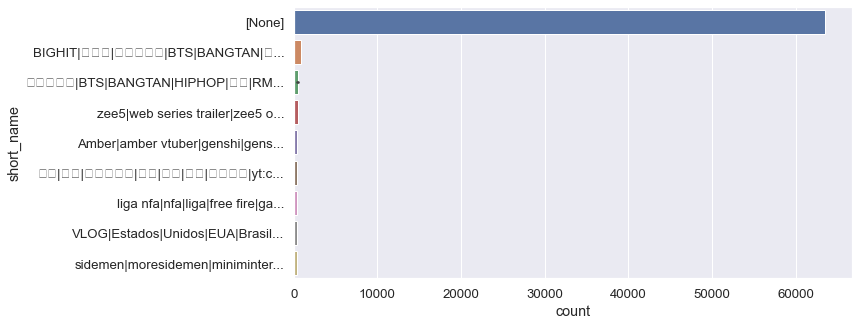


===
thumbnail_link

                                   thumbnail_link  count
0  https://i.ytimg.com/vi/pvPsJFRGleA/default.jpg     77
1  https://i.ytimg.com/vi/gdZLi9oWNZg/default.jpg     75
2  https://i.ytimg.com/vi/vRXZj0DzXIA/default.jpg     74
3  https://i.ytimg.com/vi/CKZvWhCqx1s/default.jpg     74
4  https://i.ytimg.com/vi/_ysomCGaZLw/default.jpg     73
5  https://i.ytimg.com/vi/dyRsYk0LyA8/default.jpg     72
6  https://i.ytimg.com/vi/9rhadTURsrw/default.jpg     72
7  https://i.ytimg.com/vi/zFT3f9biz68/default.jpg     72
8  https://i.ytimg.com/vi/vtRJZEHdu8M/default.jpg     71
9  https://i.ytimg.com/vi/3CxtK7-XtE0/default.jpg     69


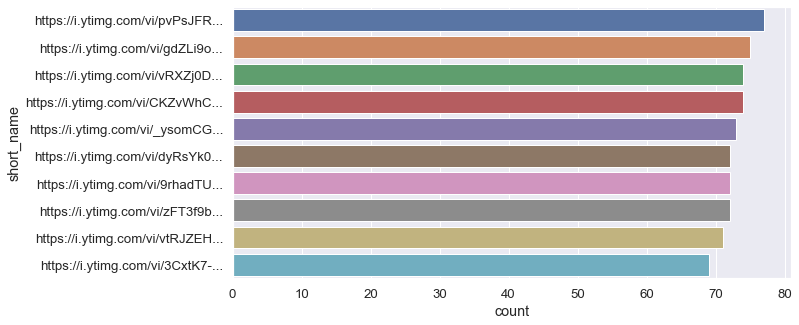


===
description

                                         description  count
0  Connect with BTS: https://ibighit.com/bts http...    588
1                                            #shorts    413
2  Canal de Games: https://goo.gl/BHD7sB♦ Redes S...    287
3  LINDURAS GRACIAS POR VER ESTE VIDEO ME ENCANTA...    249
4  Download NOW!! ►► https://supr.cl/playbrawlBe ...    232
5                                   #BiggBossTelugu4    221
6  Watch tomorrow’s Premiere Episodes of ZEE TV s...    199
7  #BiggBossTamil #BiggBossTamil4 #BB #BiggBoss4 ...    196
8  Após as aulas, os vídeos estarão disponíveis n...    188
9  Click the Caption button to activate subtitle!...    162


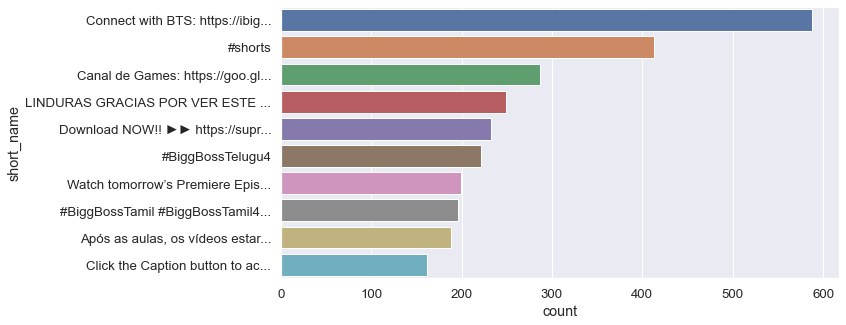


===
country

  country  count
0      GB  56395
1      BR  56393
2      FR  56393
3      US  56391
4      DE  56345
5      CA  56344
6      MX  56199
7      KR  53354
8      IN  52060


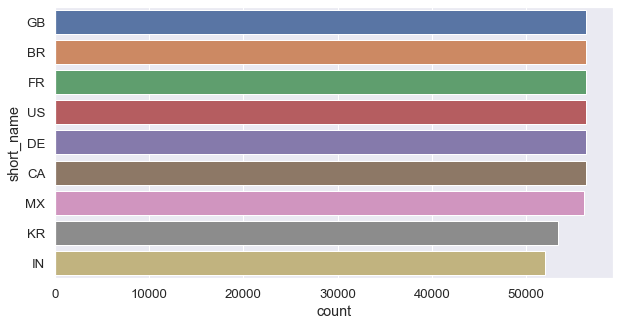


===
publishedAt_w

  publishedAt_w  count
0        Friday  79466
1        Monday  73438
2       Tuesday  73188
3     Wednesday  72627
4        Sunday  72126
5      Thursday  71150
6      Saturday  57879


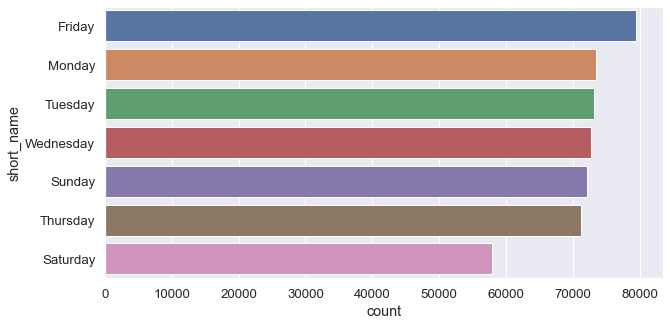


===
trending_date_w

  trending_date_w  count
0        Thursday  72678
1          Friday  72652
2        Saturday  72419
3          Monday  71130
4       Wednesday  70922
5         Tuesday  70837
6          Sunday  69236


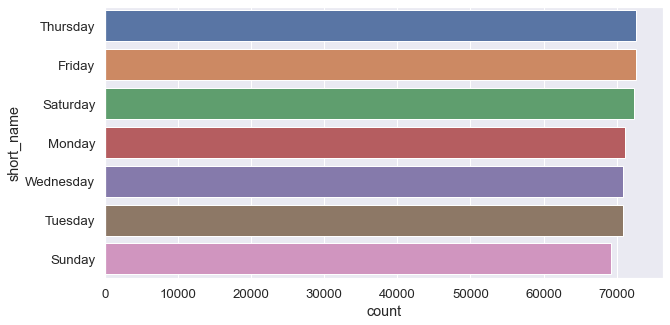

In [30]:
# plotting top 10 count of categorical features

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    for col in df.select_dtypes(include='object').columns:

        print('===')
        print('\033[1m' + col + '\033[0m')
        print('')

        df_count = pd.DataFrame(data=df[col].value_counts().head(10)).reset_index(drop=False).rename(columns={col:'count', 'index':col})
        print(df_count)

        df_count.loc[df_count[col].str.len() > 30, 'short_name'] = df_count[col].str[:30] + '...'
        df_count.loc[df_count[col].str.len() <= 30, 'short_name'] = df_count[col]

        plt.figure(figsize = (10,5))
        sns.barplot(data=df_count, x='count', y='short_name')
        plt.show();

        print('')

===
tags

                                                tags  count
1                    BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄    895
2  방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...    529
3  zee5|web series trailer|zee5 originals|latest ...    514
4  방탄소년단|BTS|BANGTAN|HIPHOP|알엠|RM|슈가|SUGA|제이홉|jho...    426
5  Amber|amber vtuber|genshi|genshi game|genshi i...    420
6                 짤툰|만화|애니메이션|웹툰|병맛|더빙|병맛더빙|yt:cc=on    414
7  liga nfa|nfa|liga|free fire|garena|lbff|copa f...    341
8  VLOG|Estados|Unidos|EUA|Brasil|Brazil|Breakmen...    325
9  sidemen|moresidemen|miniminter|ksi|zerkaa|behz...    324


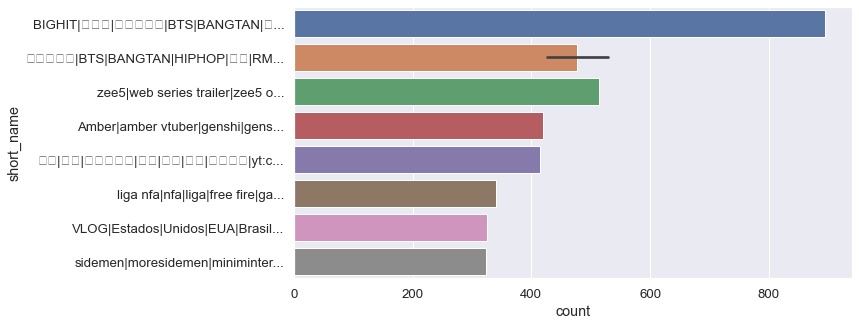

In [31]:
# rerunning tags column without None entry

with warnings.catch_warnings():
    warnings.simplefilter("ignore")

    col = 'tags'
    
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')

    df_count = pd.DataFrame(data=df[col].value_counts().head(10)).reset_index(drop=False).rename(columns={col:'count', 'index':col})
    df_count = df_count.iloc[1:]
    print(df_count)

    df_count.loc[df_count[col].str.len() > 30, 'short_name'] = df_count[col].str[:30] + '...'
    df_count.loc[df_count[col].str.len() <= 30, 'short_name'] = df_count[col]

    plt.figure(figsize = (10,5))
    sns.barplot(data=df_count, x='count', y='short_name')
    plt.show();

    print('')

## Binary data

In [32]:
for col in df.select_dtypes(include='bool').columns:
    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')
    print(pd.DataFrame(data=df[col].value_counts().head(10)).reset_index(drop=False).rename(columns={col:'count', 'index':col}))
    print('')

===
comments_disabled

   comments_disabled   count
0              False  492152
1               True    7722

===
ratings_disabled

   ratings_disabled   count
0             False  496072
1              True    3802



---

# Correlation

## All features

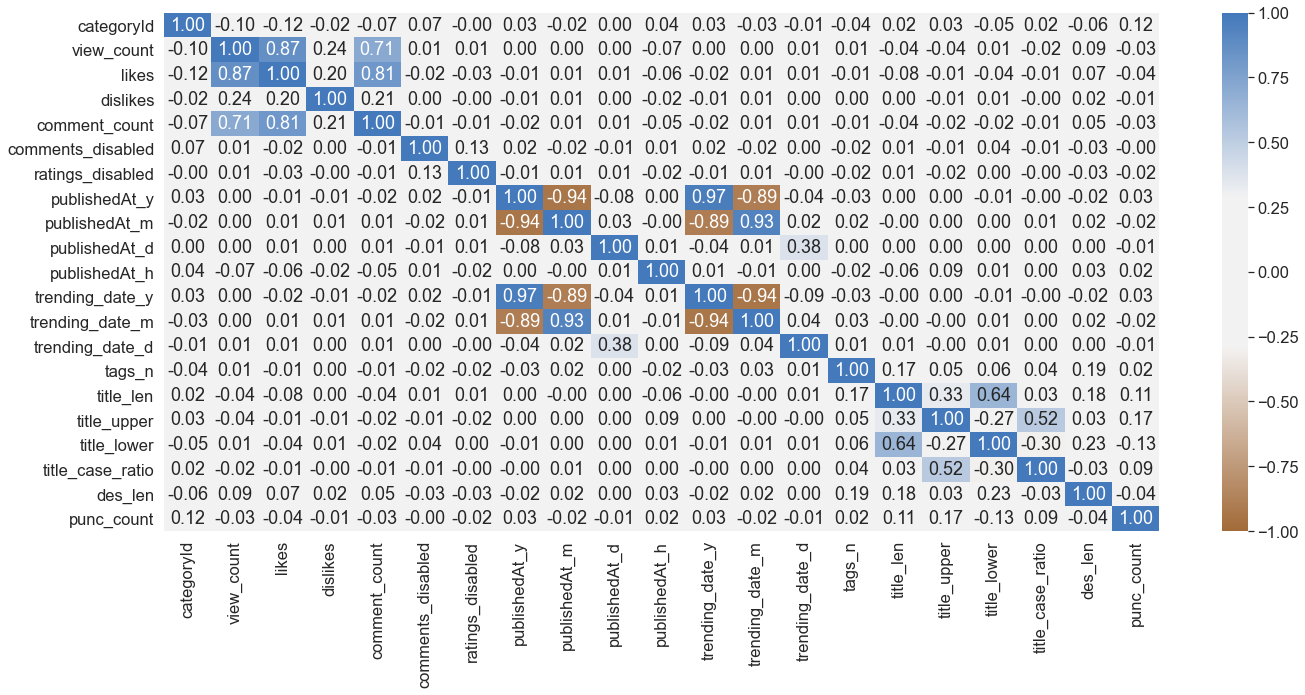

In [33]:
sns.set(font_scale=1.5)
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap=sns.diverging_palette(40, 250, sep=75, as_cmap=True), vmax=1, vmin=-1);
plt.tight_layout()

## Features vs. view_count

===
likes



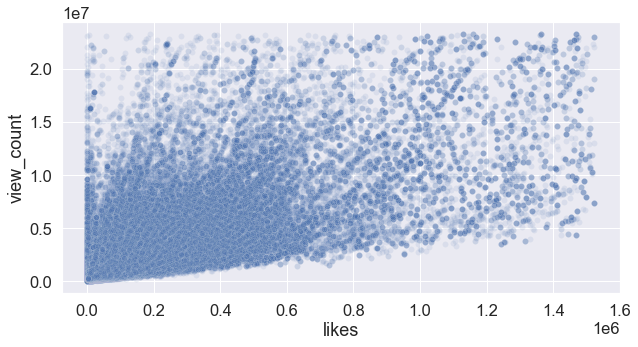


===
dislikes



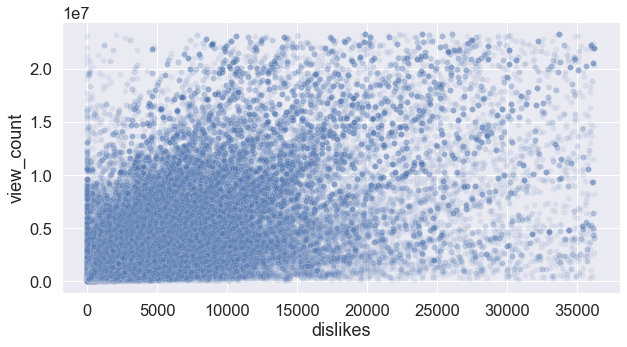


===
comment_count



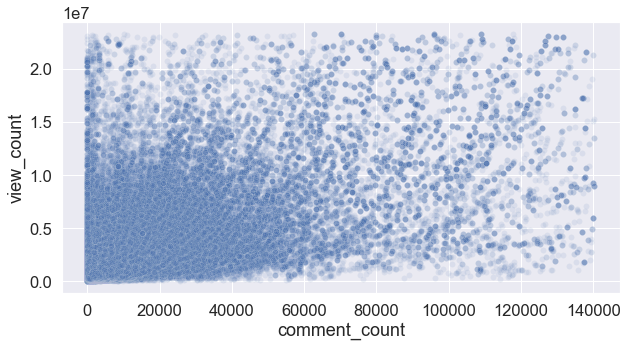


===
comments_disabled



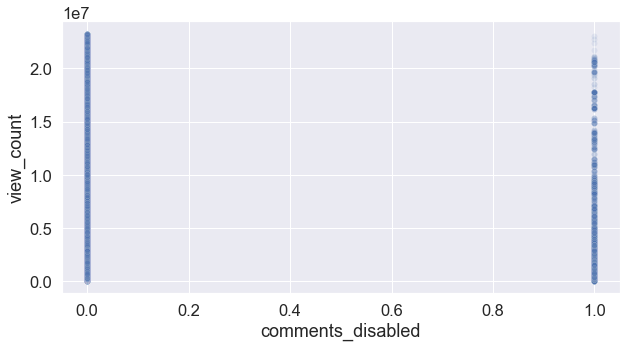


===
ratings_disabled



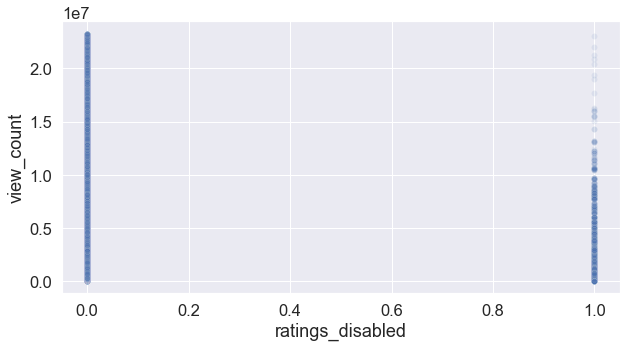


===
publishedAt_y



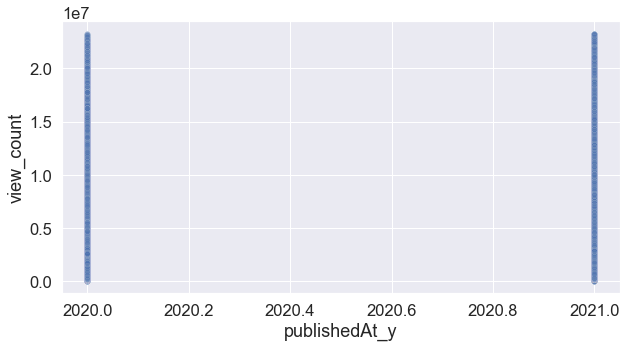


===
publishedAt_m



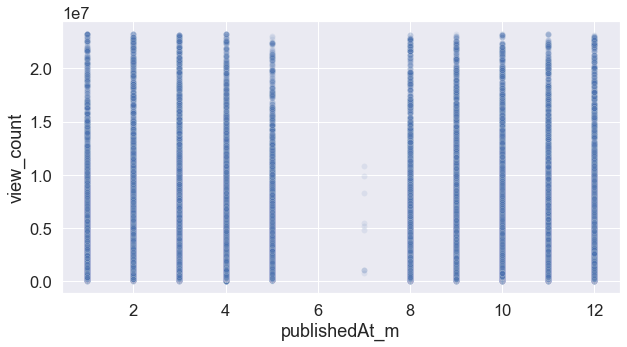


===
publishedAt_d



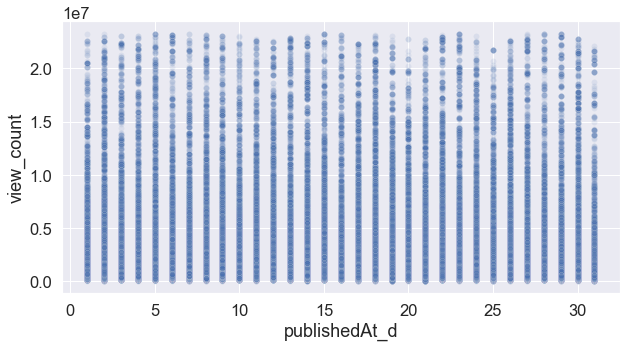


===
publishedAt_h



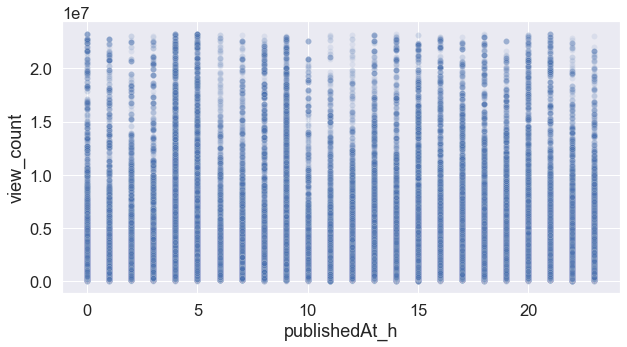

In [34]:
cols = 'likes dislikes comment_count comments_disabled ratings_disabled publishedAt_y publishedAt_m publishedAt_d publishedAt_h'.split()

for col in cols:

    print('===')
    print('\033[1m' + col + '\033[0m')
    print('')

    plt.figure(figsize = (10,5))
    sns.scatterplot(data=df_99, x=col, y='view_count', alpha=0.1)
    plt.show();
    print('')

---

# Exporting dataset

In [36]:
path = '../../dataset/'

df.to_csv(path + 'eda_export.csv', index=False)

---